Activity 3: K-means clustering with Pew Data

Referred from http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/

In [ ]:
install.packages("dplyr")
install.packages("methods")
install.packages("sqldf")
install.packages("ggplot2")
install.packages("class")

In [16]:
library("dplyr")
library("methods")
library("sqldf")
library("ggplot2")
library("class")

In [31]:
#Loading the data from the file CSV.csv
data = read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

In [32]:
head(data)
colnames(data)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


[1] "psraid"     "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

In [33]:
#Considering only the required columns
new_data = data %>% select(sex,age,eminuse,intmob,educ2,inc)
head(new_data)

sex,age,eminuse,intmob,educ2,inc
2,47,1,1,6,99
2,63,1,1,4,6
2,86,2,2,1,3
2,40,1,1,5,6
2,65,1,2,4,3
2,69,1,1,6,8


In [34]:
#Modifying the values
index1 = new_data$educ2 == 98
index2 = new_data$educ2 == 99
index3 = new_data$inc == 98
index4 = new_data$inc == 99

new_data$educ2[index1] = 0
new_data$educ2[index2] = 0
new_data$inc[index3] = 0
new_data$inc[index4] = 0

head(new_data)

sex,age,eminuse,intmob,educ2,inc
2,47,1,1,6,0
2,63,1,1,4,6
2,86,2,2,1,3
2,40,1,1,5,6
2,65,1,2,4,3
2,69,1,1,6,8


In [35]:
#Normalizing the column of age
min_age = min(new_data[,2])
max_age = max(new_data[,2])

for( i in (1:nrow(new_data)))
    {
    x = new_data$age[i]
    
    n_age = (x - min_age)/(max_age - min_age)
    
    new_data$norm_age[i] = n_age
}

In [36]:
head(new_data)

sex,age,eminuse,intmob,educ2,inc,norm_age
2,47,1,1,6,0,0.3580247
2,63,1,1,4,6,0.5555556
2,86,2,2,1,3,0.8395062
2,40,1,1,5,6,0.2716049
2,65,1,2,4,3,0.5802469
2,69,1,1,6,8,0.6296296


In [37]:
list1 = new_data %>% select(sex,eminuse,intmob,educ2,inc,norm_age)
set.seed(76964057)

In [38]:
#K means algorithm
#For 3 clusters
k <-kmeans(list1, centers=3) 
k$centers #Display&nbsp;cluster centers
table(k$cluster)

,sex,eminuse,intmob,educ2,inc,norm_age
1,1.560060,1.300300,1.394895,4.114114,0.8738739,0.4515812
2,1.475410,1.196721,1.304189,3.617486,4.4644809,0.4126695
3,1.480916,1.038168,1.129771,6.315522,7.2099237,0.4011246



  1   2   3 
666 549 786 

In [39]:
#For 5 clusters
k <-kmeans(list1, centers=5) 
k$centers #Display&nbsp;cluster centers
table(k$cluster)

,sex,eminuse,intmob,educ2,inc,norm_age
1,1.547718,1.307054,1.406639,3.578838,1.427386,0.4250807
2,1.474870,1.145581,1.239168,3.859619,5.686308,0.3920021
3,1.564286,1.492857,1.442857,1.342857,1.364286,0.4268078
4,1.472125,1.027875,1.130662,6.897213,7.428571,0.4174947
5,1.543860,1.092105,1.267544,6.978070,1.210526,0.4917695



  1   2   3   4   5 
482 577 140 574 228 

In [40]:
#For 6 clusters
k <-kmeans(list1, centers=6) 
k$centers #Display&nbsp;cluster centers
table(k$cluster)

,sex,eminuse,intmob,educ2,inc,norm_age
1,1.472441,1.027559,1.129921,7.007874,7.4704724,0.4161806
2,1.587156,1.087156,1.247706,6.522936,0.5412844,0.4875411
3,1.523077,1.056410,1.241026,6.338462,4.0666667,0.4023425
4,1.425150,1.116766,1.167665,3.796407,7.0299401,0.3868559
5,1.549884,1.394432,1.443155,2.770302,0.9582367,0.4306379
6,1.517460,1.269841,1.374603,3.206349,3.9142857,0.4178326



  1   2   3   4   5   6 
508 218 195 334 431 315 

In [41]:
#For 9 clusters
k <-kmeans(list1, centers=9) 
k$centers #Display&nbsp;cluster centers
table(k$cluster)

,sex,eminuse,intmob,educ2,inc,norm_age
1,1.438776,1.336735,1.316327,2.714286,2.2653061,0.3885739
2,1.609756,1.397213,1.463415,2.742160,0.4355401,0.4420355
3,1.513761,1.541284,1.688073,2.990826,3.7431193,0.5177257
4,1.430052,1.093264,1.129534,3.777202,7.7772021,0.3614150
5,1.390625,1.182292,1.302083,3.375000,5.5416667,0.4166024
6,1.460784,1.022876,1.098039,7.287582,8.2189542,0.4290729
7,1.584699,1.049180,1.207650,4.972678,3.4480874,0.3710450
8,1.525000,1.034375,1.171875,6.534375,5.9062500,0.3998843
9,1.562791,1.088372,1.260465,6.683721,0.5674419,0.4941143



  1   2   3   4   5   6   7   8   9 
196 287 109 193 192 306 183 320 215 

In [42]:
sort(table(new_data$intmob), decreasing=TRUE)


   1    2    9 
1483  516    2 

In [43]:
sort(table(new_data$eminuse), decreasing=TRUE)


   1    2    9 
1670  330    1 

In [44]:
sort(table(new_data$educ2), decreasing=TRUE)


  3   6   8   4   5   2   1   7   0 
483 410 377 340 183  86  66  36  20 

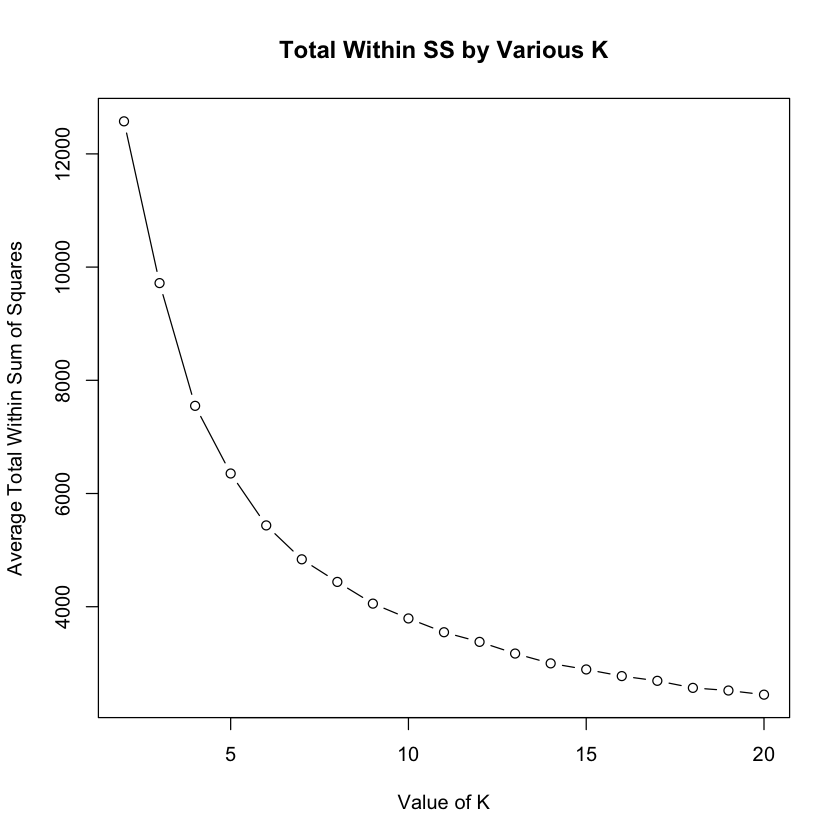

In [46]:
#Plotting

avg.totw.ss <-integer(length(rng)) 
for(v in (2:20)){ 
 v.totw.ss <-integer(100) 
 for(i in 1:100){
 k.temp <-kmeans(list1,centers=v) 
 v.totw.ss[i] <-k.temp$tot.withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) 
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K", ylab="Average Total Within Sum of Squares", xlab="Value of K")

Interpretation:

Around, k=6, there is no significant gain. Therefore, we can choose 6 clusters.